### This project goal is to predict what the person is doing using gyrometer and accelerometer reading

In [46]:
# library's and  data understanding
# 1. importing necessary data
# 2. Loading data
# 3. Data Pre-processing
#        3.1-> checking for duplicates
#        3.2-> checking for missing value
#        3.3-> Checking for class imbalance

# 4. Exploratory data analysis
#        4.1-> Analyzing the t-bodyAccMag mean feature
#        4.2-> Analyzing the angle between x-axis and gravityMean feature
#        4.3-> Analyzing the angle between y-axis and gravityMean feature
#        4.4-> Visualizing data using t-SNE

# 5. Model prediction and evaluation
#        5.1-> logistic regression with hyperparameter tuning and cross validation
#        5.2-> Linear SVM model with hyperparameter tuning and cross validation
#        5.3-> Kernel SVM model with hyperparameter tuning and cross validation
#        5.4-> Decision Tree model with hyperparameter tuning and cross validation
#        5.5-> random Forest model with hyperparameter tuning and cross validation

## Importing necessary library

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from sklearn.model_selection import RandomizedSearchCV



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


## Loading the data set

In [48]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [49]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [51]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

## 3. data preprocessing

### checking for duplicates

In [52]:
print("Number of duplicates in train : " , sum(train.duplicated()))
print("Number of duplicates in test : " , sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


### Checking for missing value

In [53]:
print("Number of missing values in train : " , sum(train.isna().sum()))
print("Number of missing values in test : " , sum(test.isna().sum()))

Number of missing values in train :  0
Number of missing values in test :  0


### Checking for class imbalance

In [54]:
pd.DataFrame(train)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [55]:
#plt.figure(figsize=(10,8))
#plt.title("Barplot of activity")
#sns.countplot( train.Activity)
#plt.xticks(rotation = 30)
#plt.show()

There is almost same no of observations across all the six activities so this data not have class imbalance

## Exploratory Data Analysis

In [56]:
Counter([col.split('-')[0].split('(')[0] for col in train.columns])

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [57]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]) , orient='index').rename(columns={0:'Count'}).sort_values('Count' , ascending=False)

,Count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


### 4(a)   Analyzing tBodyAccMag-mean feature

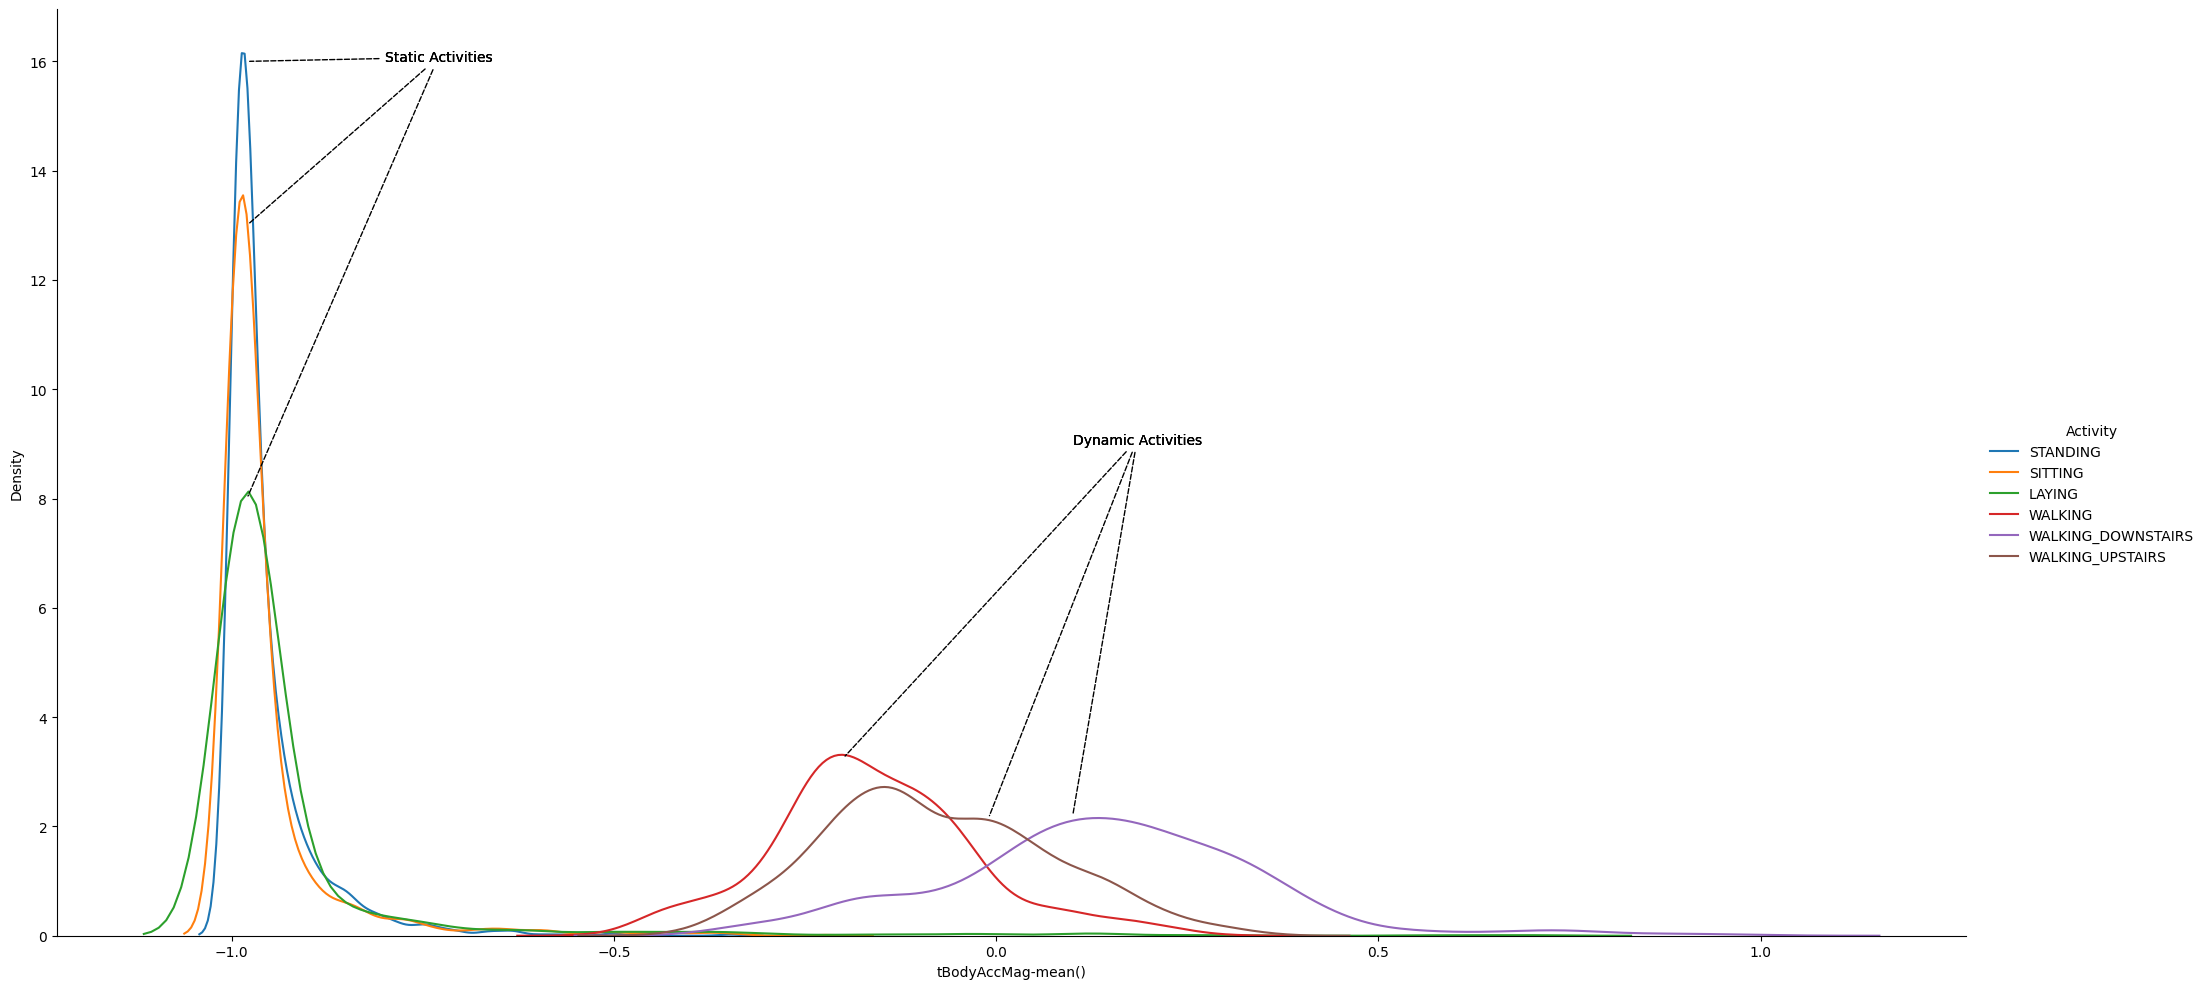

In [58]:
facegrid = sns.FacetGrid(train , hue='Activity' , height=10 , aspect= 2)
facegrid.map(sns.distplot , 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activities" , xy=(-.98,8) , xytext=(-.8,16) , arrowprops={'arrowstyle': '-','ls':'dashed'})
plt.annotate("Static Activities" , xy=(-.98,13) , xytext=(-.8,16) , arrowprops={'arrowstyle': '-','ls':'dashed'})
plt.annotate("Static Activities" , xy=(-.98,16) , xytext=(-.8,16) , arrowprops={'arrowstyle': '-','ls':'dashed'})

plt.annotate("Dynamic Activities" , xy=(-0.2,3.25) , xytext=(0.1,9) , arrowprops={'arrowstyle': '-','ls':'dashed'})
plt.annotate("Dynamic Activities" , xy=(0.1,2.18) , xytext=(0.1,9) , arrowprops={'arrowstyle': '-','ls':'dashed'})
plt.annotate("Dynamic Activities" , xy=(-0.01,2.15) , xytext=(0.1,9) , arrowprops={'arrowstyle': '-','ls':'dashed'})

plt.show()

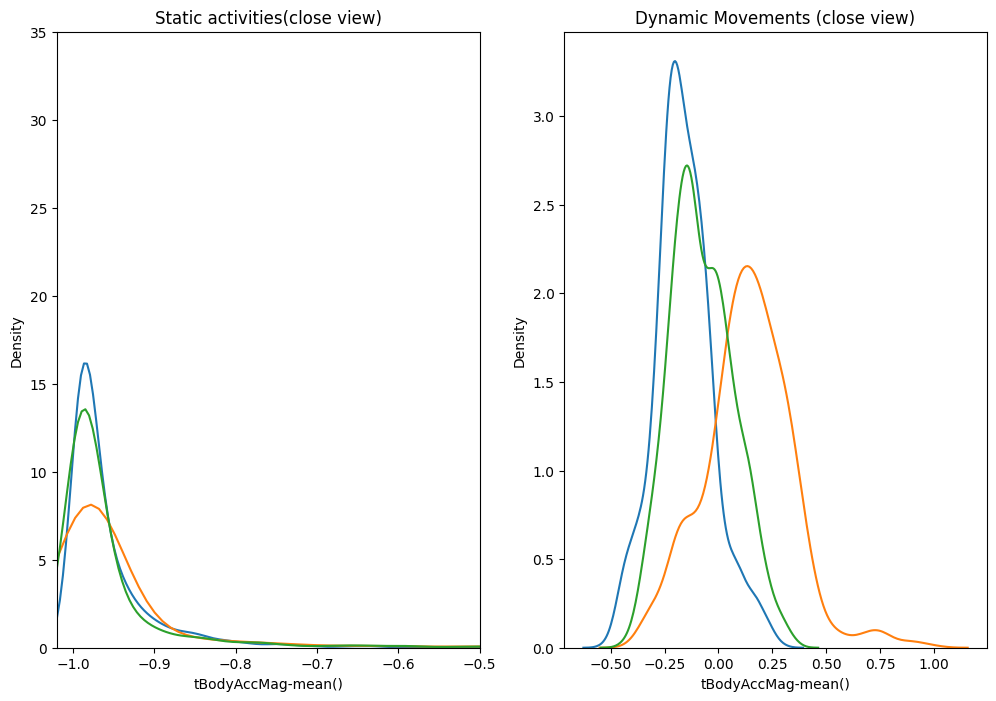

In [59]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static activities(close view)")
sns.distplot(train[train["Activity"]=="STANDING"]["tBodyAccMag-mean()"],hist=False  , label = "Standing")
sns.distplot(train[train["Activity"]=="LAYING"]["tBodyAccMag-mean()"] , hist= False , label = "Laying")
sns.distplot(train[train["Activity"]=="SITTING"]["tBodyAccMag-mean()"], hist=False  , label = "Sitting")

plt.axis([-1.02 , -0.5 , 0 ,35])
plt.subplot(1,2,2)

plt.title("Dynamic Movements (close view)")
sns.distplot(train[train["Activity"]=="WALKING"]["tBodyAccMag-mean()"],hist=False  , label = "Standing")
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]["tBodyAccMag-mean()"],hist=False  , label = "Standing")
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]["tBodyAccMag-mean()"],hist=False  , label = "Standing")
plt.show()

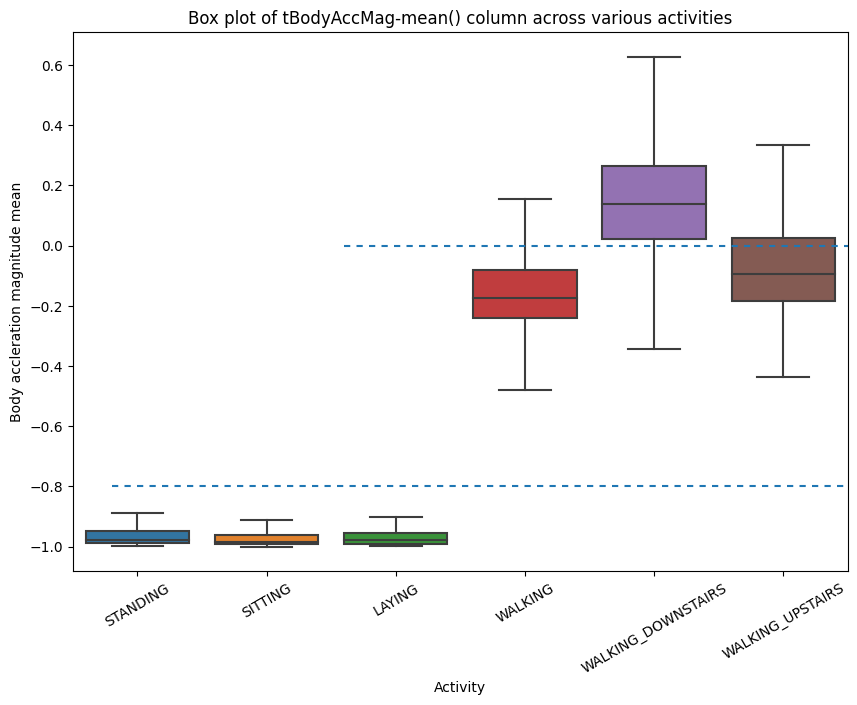

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Activity" , y="tBodyAccMag-mean()", data= train , showfliers = False)
plt.ylabel('Body accleration magnitude mean')
plt.title("Box plot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-0.8 , xmin=0.05 , dashes=(3,3))
plt.axhline(y=0.0 , xmin=0.35 , dashes=(3,3))
plt.xticks(rotation = 30)
plt.show()

### Analyzing Angle between X-axis and gravityMean feature

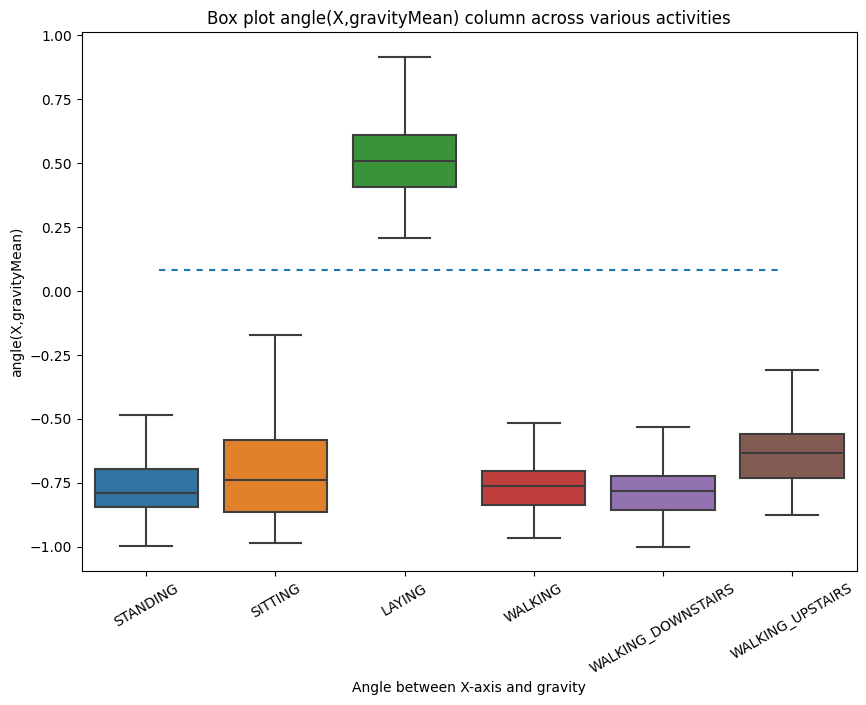

In [61]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity' , y='angle(X,gravityMean)' , data= train , showfliers = False)
plt.axhline(y=0.08 ,xmin = 0.1 , xmax = 0.9 ,dashes=(3,3))
plt.xlabel("Angle between X-axis and gravity")
plt.title("Box plot angle(X,gravityMean) column across various activities")
plt.xticks(rotation = 30)
plt.show()

### Analyzing angle between Y-axis and gravityMean feature

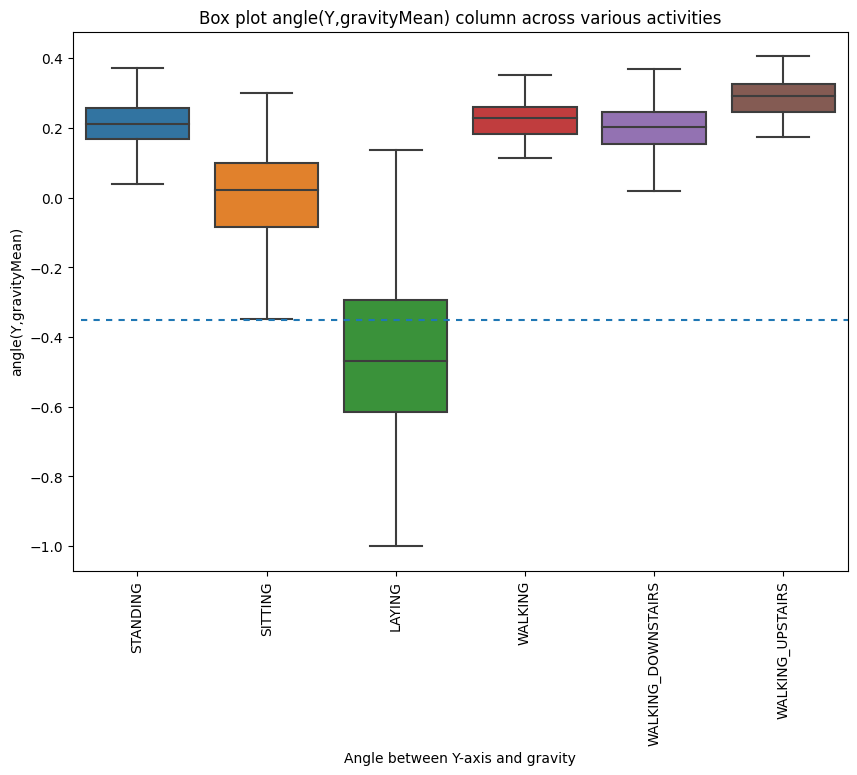

In [62]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity' , y='angle(Y,gravityMean)' , data= train , showfliers = False)
plt.xlabel("Angle between Y-axis and gravity")
plt.title("Box plot angle(Y,gravityMean) column across various activities")
plt.xticks(rotation = 90)
plt.axhline(y=-0.35 , xmin=0.01 , dashes = (3,3))
plt.show()


### Visualizing data using PCA
Using PCA data can be visualized form a extremely high dimension space and still it retains lots of actual information . Given training data has 561 unique features , using visualize it to 2D space


In [63]:
x_for_pca = train.drop(['subject' , 'Activity'] ,axis = 1)
pca = PCA(n_components=2 , random_state=0).fit_transform(x_for_pca)

In [64]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

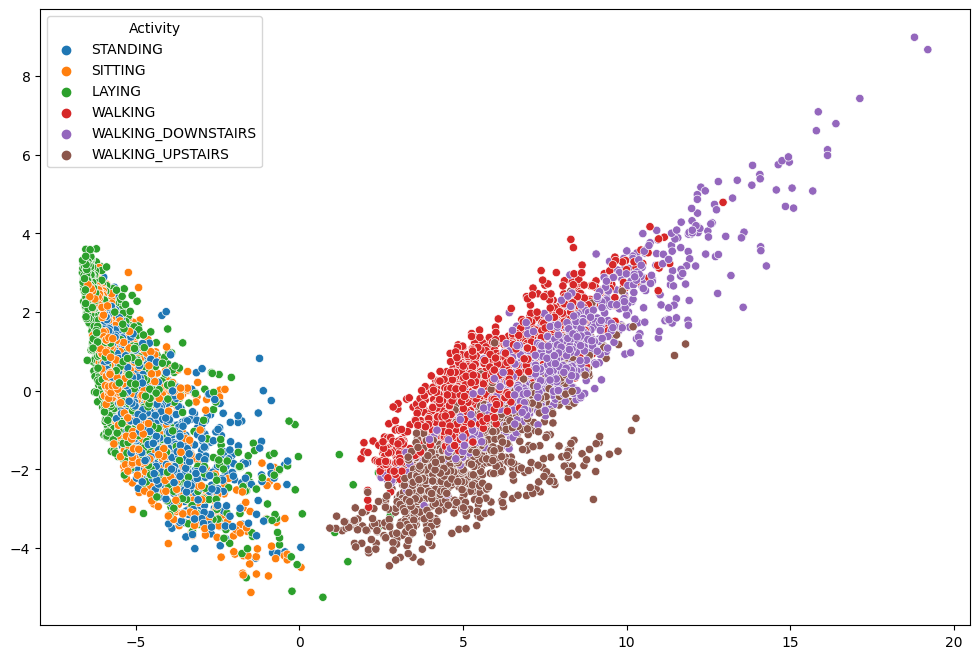

In [65]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[: , 0] , y= pca[: , 1] , hue = train['Activity'] )
plt.show()

### Visualizing data using t-SNE
using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information . Given training data has 561 unique features . let's visualize it to a 2D space

In [66]:
x_for_tsne = train.drop(['subject' , 'Activity'] ,axis = 1)
tsne = TSNE(n_components=2 , random_state=0 ,n_iter=1000).fit_transform(x_for_tsne)

In [67]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

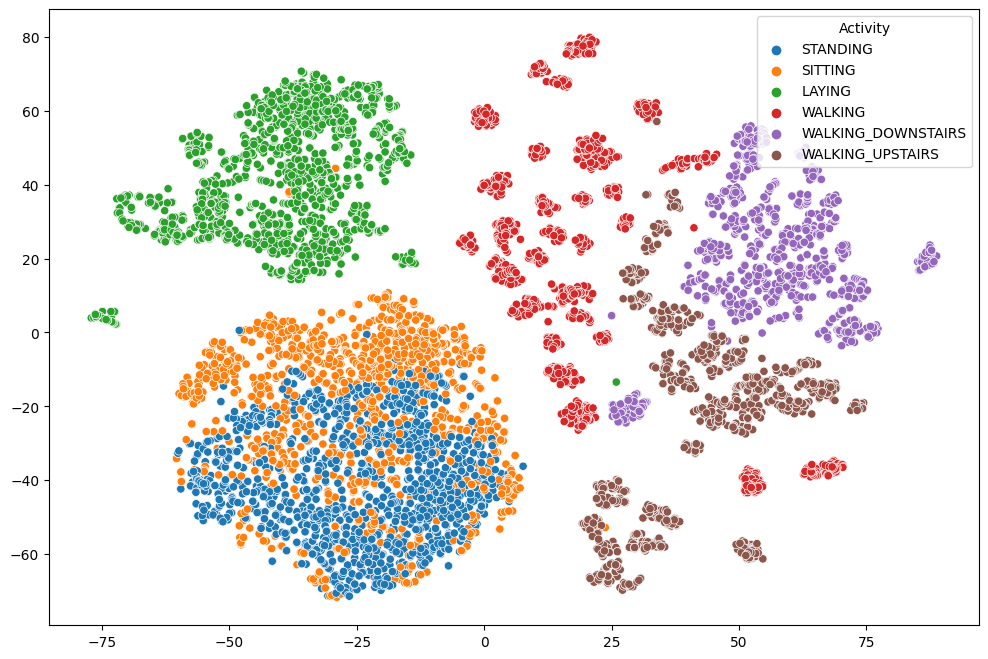

In [68]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[: , 0] , y= tsne[: , 1] , hue = train['Activity'] )
plt.show()

## ML model

Getting training and test data ready

In [69]:
xtrain = train.drop(['subject' , 'Activity'] , axis = 1)
ytrain = train.Activity

xtest = test.drop(['subject' , 'Activity' ], axis = 1)
ytest = test.Activity

In [70]:
print('Training data size :' , xtrain.shape)
print('Test data size : ' ,xtest.shape)

Training data size : (7352, 561)
Test data size :  (999, 561)


logistic regression model with hyperparameter tuning and cross validation

In [86]:
parameters = {'max_iter' : [100,200,500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier , param_distributions = parameters,cv = 5 , random_state= 42)
lr_classifier_rs.fit(xtrain ,ytrain)
y_pred_lr = lr_classifier_rs.predict(xtest)

In [87]:
lr_accuracy = accuracy_score(y_true=ytest , y_pred= y_pred_lr)
print('Accuracy of logistic regression : ' , lr_accuracy)
# it has 95% accuracy

Accuracy of logistic regression :  0.954954954954955


In [89]:
def plot_confusion_matrix(cm , labels):
    fig , ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix
    im = ax.imshow(cm , interpolation='nearest' , cmap=plt.cm.Blues)
    ax.figure.colorbar(im , ax=ax)
    ax.set(xticks = np.arange(cm.shape[1]),
    yticks = np.arange(cm.shape[0]),
    xticklabels = labels, yticklabels = labels ,
    ylabel = 'True label',
    xlabel = 'Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max()/2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,int(cm[i,j]) , ha = "center" ,va = "center" , color = "white" if cm[i,j]>thresh else "black")
    fig.tight_layout()

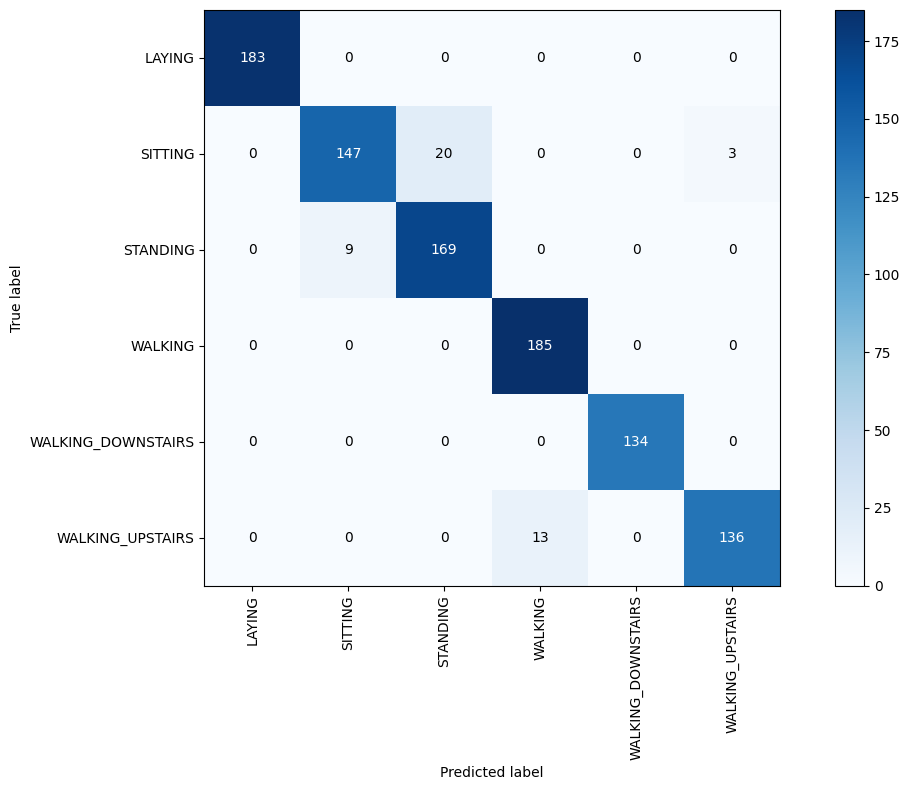

In [90]:
cm = confusion_matrix(ytest.values , y_pred_lr)
plot_confusion_matrix(cm,np.unique(y_pred_lr))

In [94]:
# function to get best random search attribute
def get_best_randomsearch_results(model):
    print("best estimator : "  , model.best_estimator_)
    print("Best set of parameters : " , model.best_params_)
    print("Best score : " , model.best_score_)


In [95]:
get_best_randomsearch_results(lr_classifier_rs)

best estimator :  LogisticRegression(max_iter=200)
Best set of parameters :  {'max_iter': 200}
Best score :  0.9370314978472696


### kernel SVM model with Hyperparameter tuning and cross validation

In [96]:
parameters = {
    'kernel' : ['linear' , 'rbf' , 'poly' , 'sigmoid'],
    'C' : [100 , 50]
}

svm_rs = RandomizedSearchCV(SVC() , param_distributions= parameters , cv = 3 , random_state=42)
svm_rs.fit(xtrain , ytrain)


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [101]:
y_pred = svm_rs.predict(xtest)

In [102]:
kernel_svm_accuracy = accuracy_score(y_true=ytest , y_pred=y_pred)
print("accuracy using Kernel SVM : " , kernel_svm_accuracy)

accuracy using Kernel SVM :  0.965965965965966


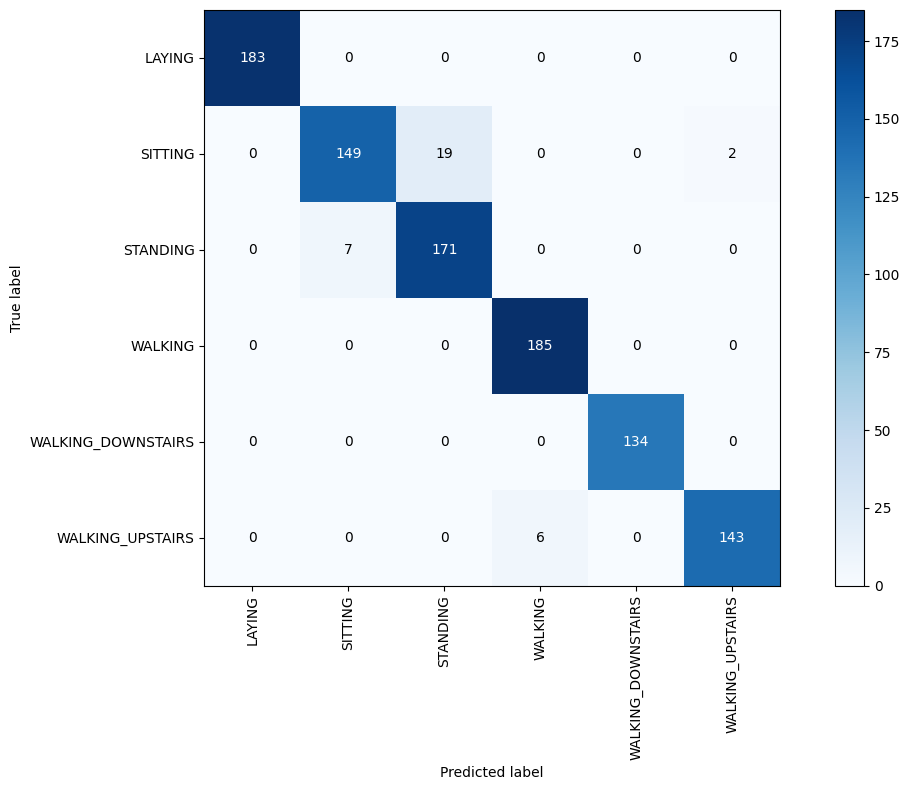

In [104]:
cm = confusion_matrix(ytest.values , y_pred)
plot_confusion_matrix(cm , np.unique(y_pred))

In [105]:
get_best_randomsearch_results(svm_rs)

best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}
Best score :  0.9464109332023303


### Descision tree model with hyperparameter tuning and cross validation

In [106]:
parameters ={'max_depth' : np.arange(2,10,2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier ,param_distributions=parameters , random_state=42)
dt_classifier_rs.fit(xtrain , ytrain)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [107]:
y_pred = dt_classifier_rs.predict(xtest)

In [108]:
dt_accuracy = accuracy_score(y_true=ytest , y_pred=y_pred)
print("accuracy using Kernel SVM : " , dt_accuracy)

accuracy using Kernel SVM :  0.8498498498498499


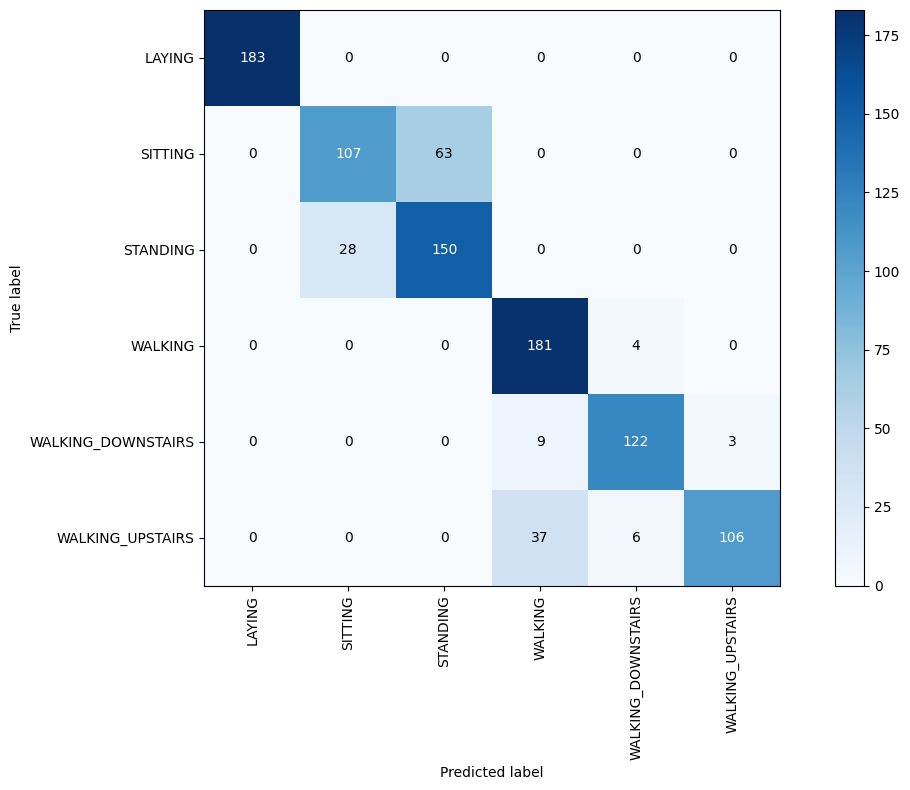

In [109]:
cm = confusion_matrix(ytest.values , y_pred)
plot_confusion_matrix(cm , np.unique(y_pred))

In [110]:
get_best_randomsearch_results(dt_classifier_rs)

best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}
Best score :  0.8539271262549887


### Random forest model with hyperparameter tuning and cross validation

In [111]:
parameters = {
    'n_estimators' : np.arange(20,101,10) , 
    'max_depth' : np.arange(2,17,2)
}

rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier , param_distributions=parameters,random_state=42)
rf_classifier_rs.fit(xtest , ytest)



RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [112]:
rf_accuracy = accuracy_score(y_true=ytest , y_pred=y_pred)
print("accuracy using Random forest  : " , rf_accuracy)

accuracy using Random forest  :  0.8498498498498499


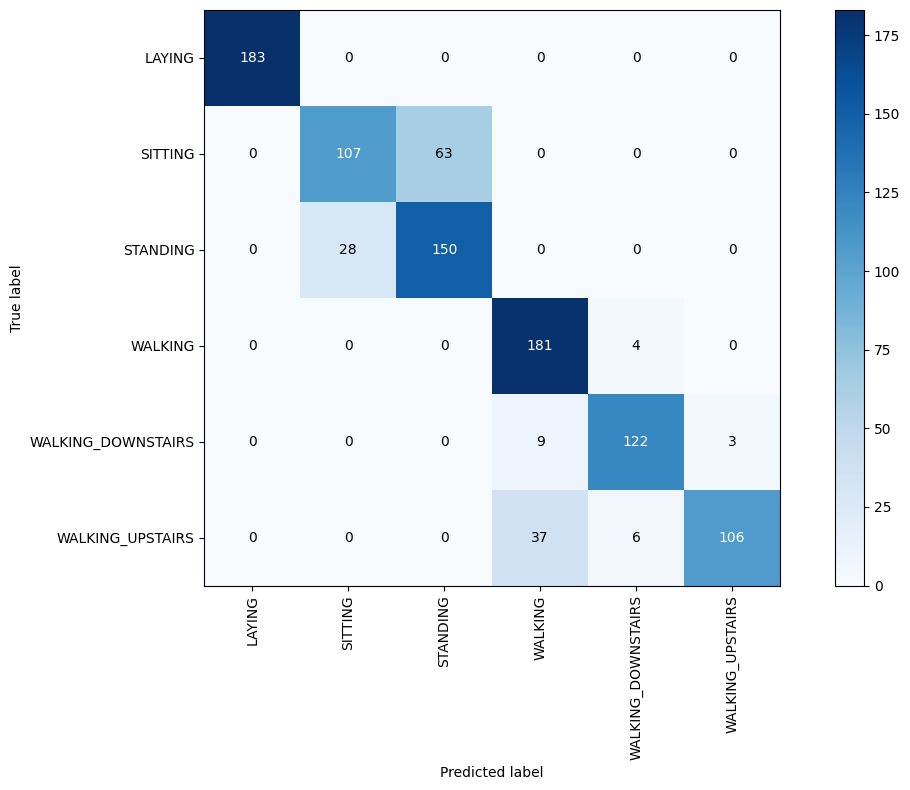

In [113]:
cm = confusion_matrix(ytest.values , y_pred)
plot_confusion_matrix(cm , np.unique(y_pred))

In [114]:
get_best_randomsearch_results(rf_classifier_rs)

best estimator :  RandomForestClassifier(max_depth=8, n_estimators=90)
Best set of parameters :  {'n_estimators': 90, 'max_depth': 8}
Best score :  0.9118643216080402
